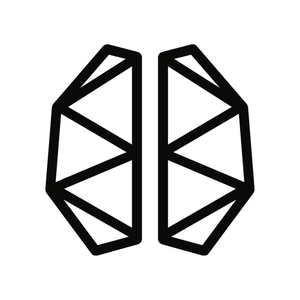

# Tumor Classification

## Table of Contents

     1. Business Understanding
     2. Data Acquisition
     3. Exploratory Data Analysis
     4. Modelling
     5. Model Evaluation
     6. Deployment

## 1. Business Understanding

**Goal:** To classify the tumor:

1. Benign (non-cancerous)
2. Malignant (cancerous)

**Dataset:** The dataset consists of features extracted from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe characteristics of the cell nuclei present in the image.

**Example:**

        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

**Notes:**

1. Datasets are linearly separable using all 30 input features
2. Number of Instances: 569
3. Class Distribution: 212 Malignant, 357 Benign
4. Target class:
         - Malignant
         - Benign

### Data Source

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

## 2. Data Acquisition

### Importing the Libraries

Let's begin by importing the libraries. 

In [67]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

Now that all the libraries has been imported, let's load the data. 

In [5]:
# Loading the data
cancer = pd.read_csv('data.csv')

In [14]:
# Let's take a look at the shape of the data
cancer.shape

(569, 33)

Hence, there are 569 observations and 33 features.Now, let's take a look at the data. 

## 3. Exploratory Data Analysis

In [6]:
# Display the first 5 rows 
cancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [7]:
# Display the last 5 rows
cancer.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

Now, we will have to check for null values. Let's use 'isnull()' method. 

In [15]:
# Check null values
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

From the above we can see that all the columns are fine except the last one where all thw values are NaN. Hence, we will drop the last column. 

In [16]:
# Dropping the last column. 
cancer = cancer.dropna(axis=1)

In [18]:
# Updated shape
cancer.shape

(569, 32)

In [17]:
# Displaying the updated table
cancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

Now that data is formatted, we will now examine our target class. 

In [19]:
# Breakdown of target class
cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

From the above, we can see that there are 357 Benign samples and 212 Malignant (Cancer) samples. Also, this is a case of data imbalance where Benign account for 62% and Malignant account for 38%. 

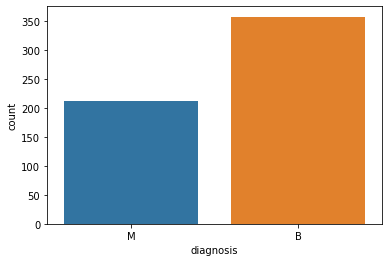

In [21]:
# Visualize the above using Seaborn
sns.countplot(cancer['diagnosis'],label="Count")

Now, we will use SKLearn's LabelEncoder to change the target labels (M and B) to  0 and 1 respectively. 

In [24]:
# Using LabelEncoder to chnage diagnosis column to boolean
labelencoder_Y = LabelEncoder()
cancer.iloc[:,1]= labelencoder_Y.fit_transform(cancer.iloc[:,1].values)

In [29]:
# Let's take a look at the diagnosis column
cancer.diagnosis.head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
Name: diagnosis, dtype: int64

We will create a pair plot with respect to diagnosis column. 

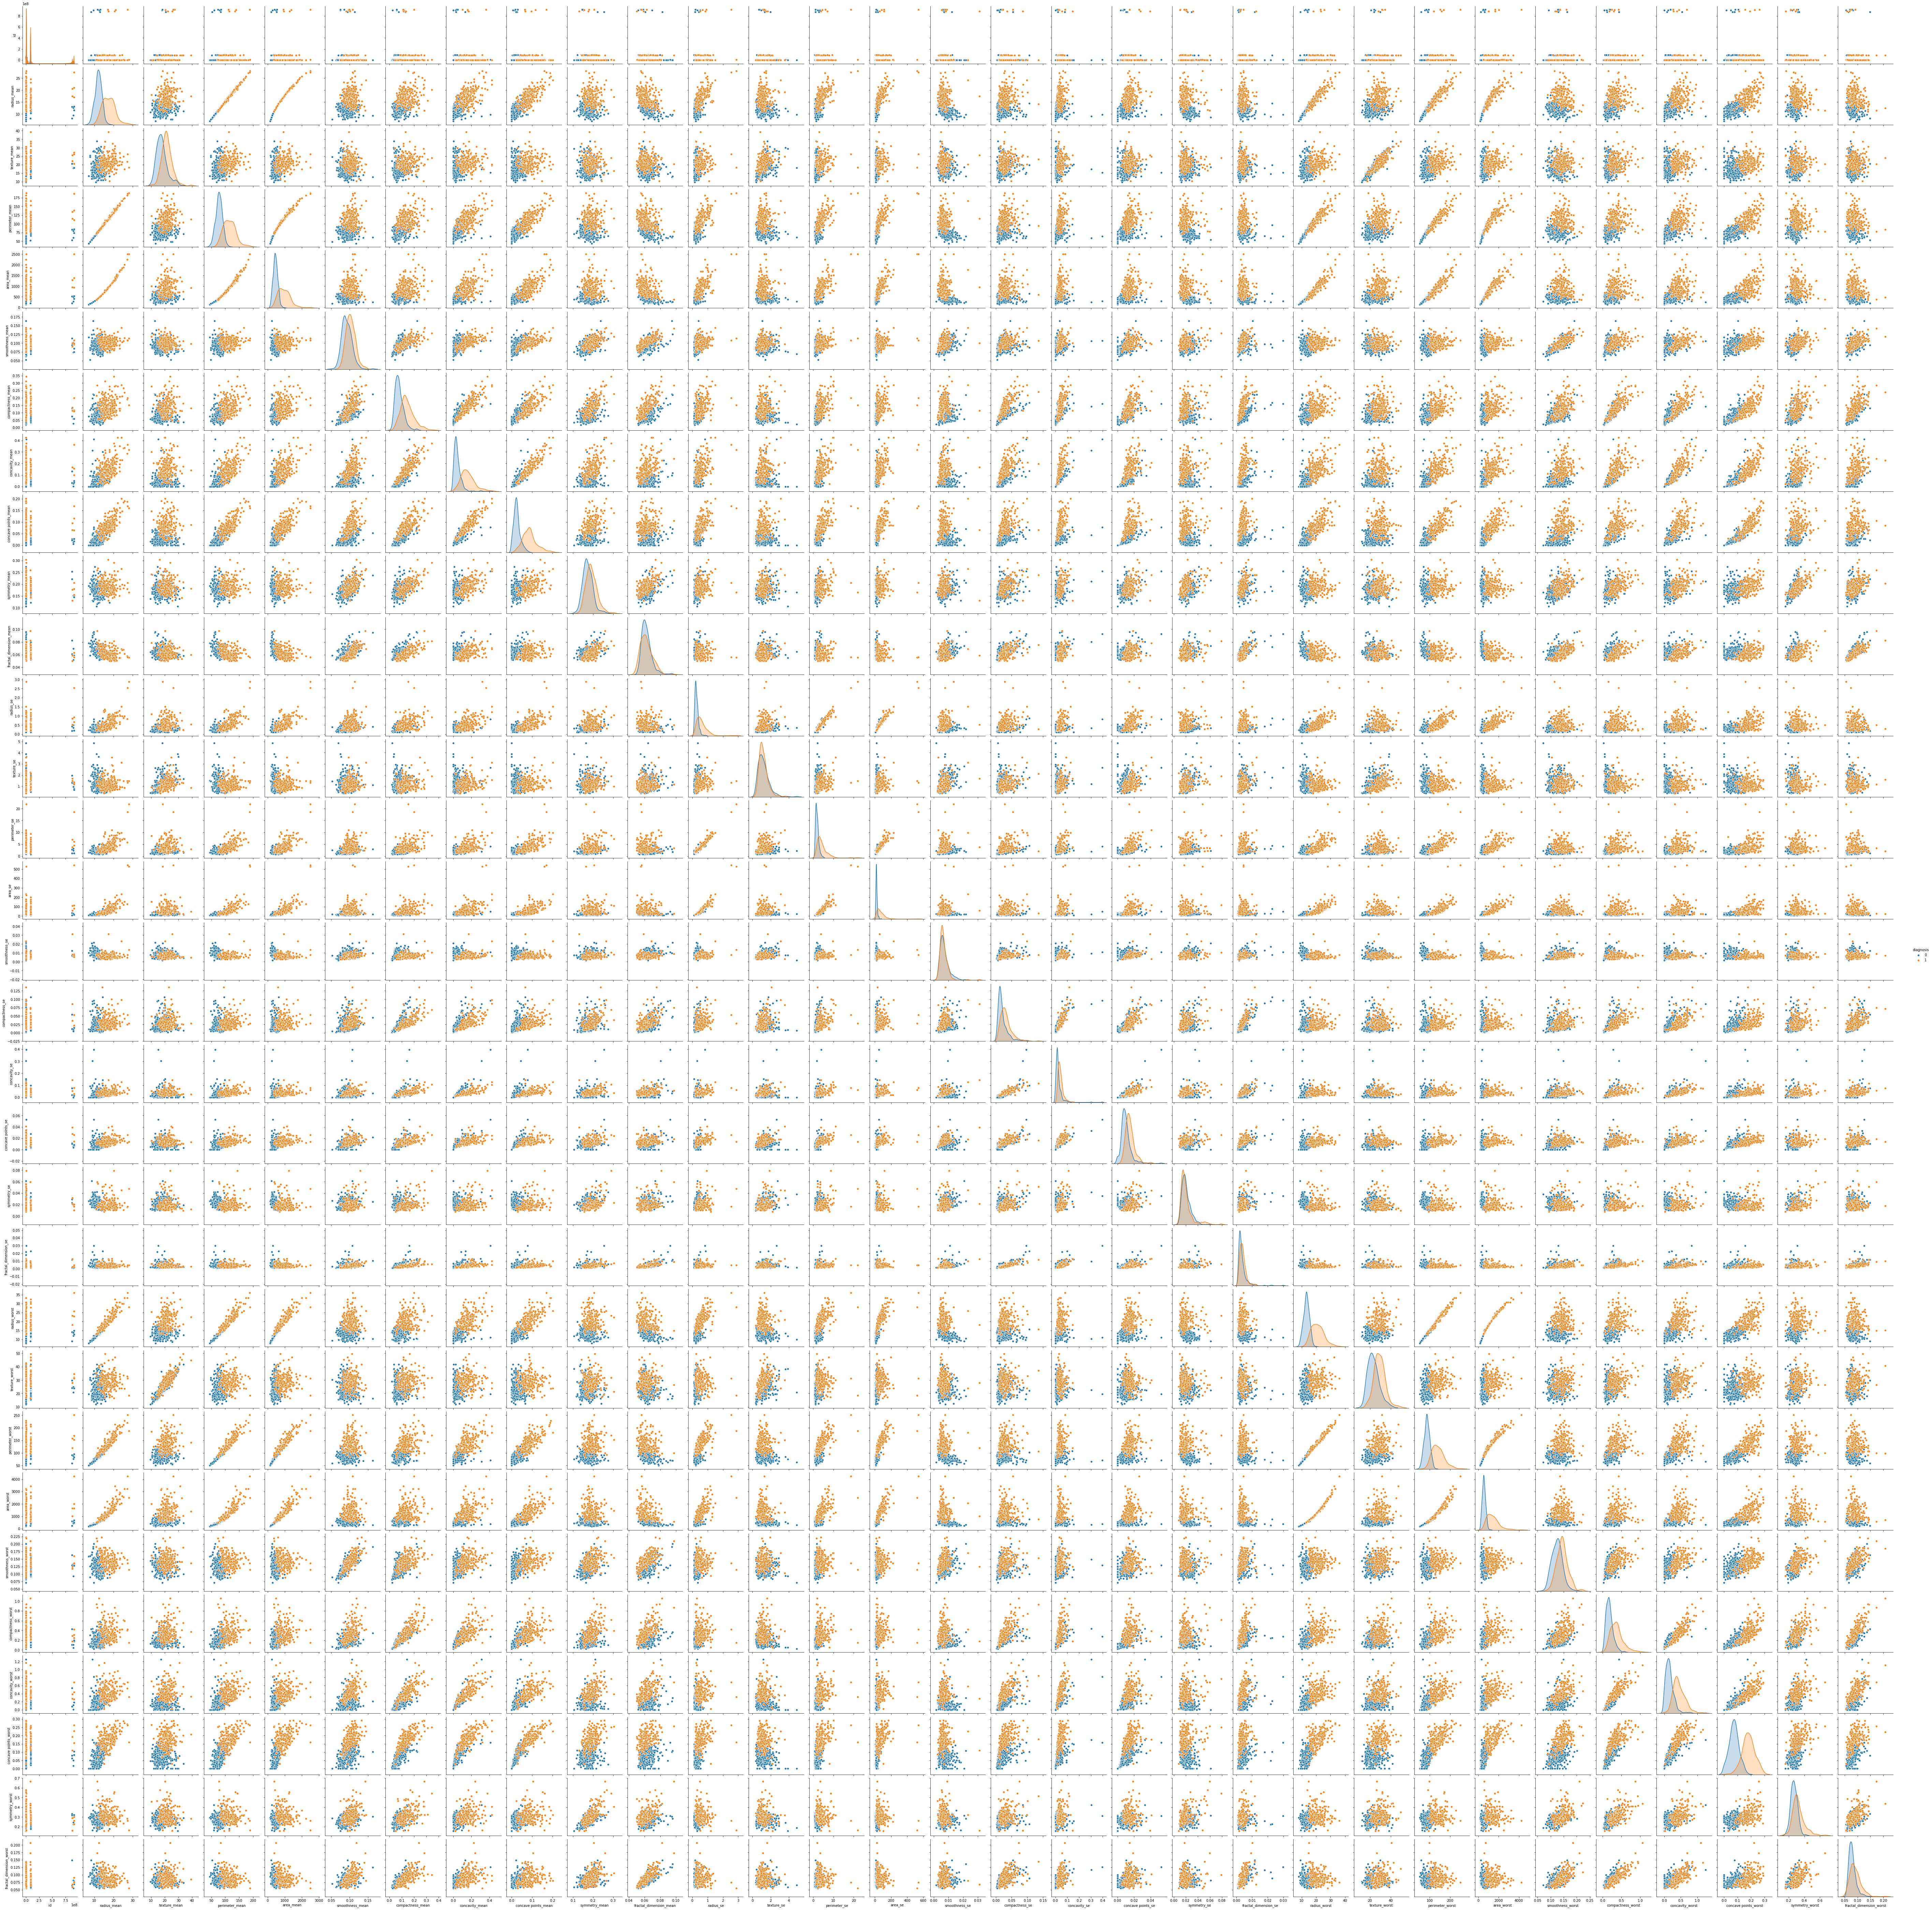

In [31]:
# Using Seaborn to create a pair plot
sns.pairplot(cancer, hue='diagnosis')

In [33]:
# Correlation
cancer.corr()

id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                0.143048   0.567134     0.679090      0.275869   
texture_se              -0.007526  -0.008303    -0.097317      0.386358   
perimeter_se             0.137331   0.556141     0.674172      0.281673   
area_se                  0.177742   0.548236     0.735864      0.259845   
smoothness_se            0.096781  -0.067016    -0.222600      0.006614   
compactness_se           0.033961   0.292999     0.206000      0.191975   
concavity_se             0.055239   0.253730     0.194204      0.143293   
concave points_se        0.078768   0.408042     0.376169      0.163851   
symmetry_se             -0.017306  -0.006522    -0.104321      0.009127   
fractal_dimension_se     0.025725   0.077972    -0.042641      0.054458   
radius_worst             0.082405   0.776454     0.969539      0.352573   
texture_worst            0.064720   0.456903     0.297008      0.912045   
perimeter_worst          0.079986   0.782914     0.965137      0.358040   
area_worst               0.107187   0.733825     0.941082      0.343546   
smoothness_worst         0.010338   0.421465     0.119616      0.077503   
compactness_worst       -0.002968   0.590998     0.413463      0.277830   
concavity_worst          0.023203   0.659610     0.526911      0.301025   
concave points_worst     0.035174   0.793566     0.744214      0.295316   
symmetry_worst          -0.044224   0.416294     0.163953      0.105008   
fractal_dimension_worst -0.029866   0.323872     0.007066      0.119205   

                         perimeter_mean  area_mean  smoothness_mean  \
id                             0.073159   0.096893        -0.012968   
diagnosis                      0.742636   0.708984         0.358560   
radius_mean                    0.997855   0.987357         0.170581   
texture_mean                   0.329533   0.321086        -0.023389   
perimeter_mean                 1.000000   0.986507         0.207278   
area_mean                      0.986507   1.000000         0.177028   
smoothness_mean                0.207278   0.177028         1.000000   
compactness_mean               0.556936   0.498502         0.659123   
concavity_mean                 0.716136   0.685983         0.521984   
concave points_mean            0.850977   0.823269         0.553695   
symmetry_mean                  0.183027   0.151293         0.557775   
fractal_dimension_mean        -0.261477  -0.283110         0.584792   
radius_se                      0.691765   0.732562         0.301467   
texture_se                    -0.086761  -0.066280         0.068406   
perimeter_se                   0.693135   0.726628         0.296092   
area_se                        0.744983   0.800086         0.246552   
smoothness_se                 -0.202694  -0.166777         0.332375   
compactness_se                 0.250744   0.212583         0.318943   
concavity_se                   0.228082   0.207660         0.248396   
concave points_se              0.407217   0.372320         0.380676   
symmetry_se                   -0.081629  -0.072497         0.200

Let's use seaborn heatmap to look into correlation. 

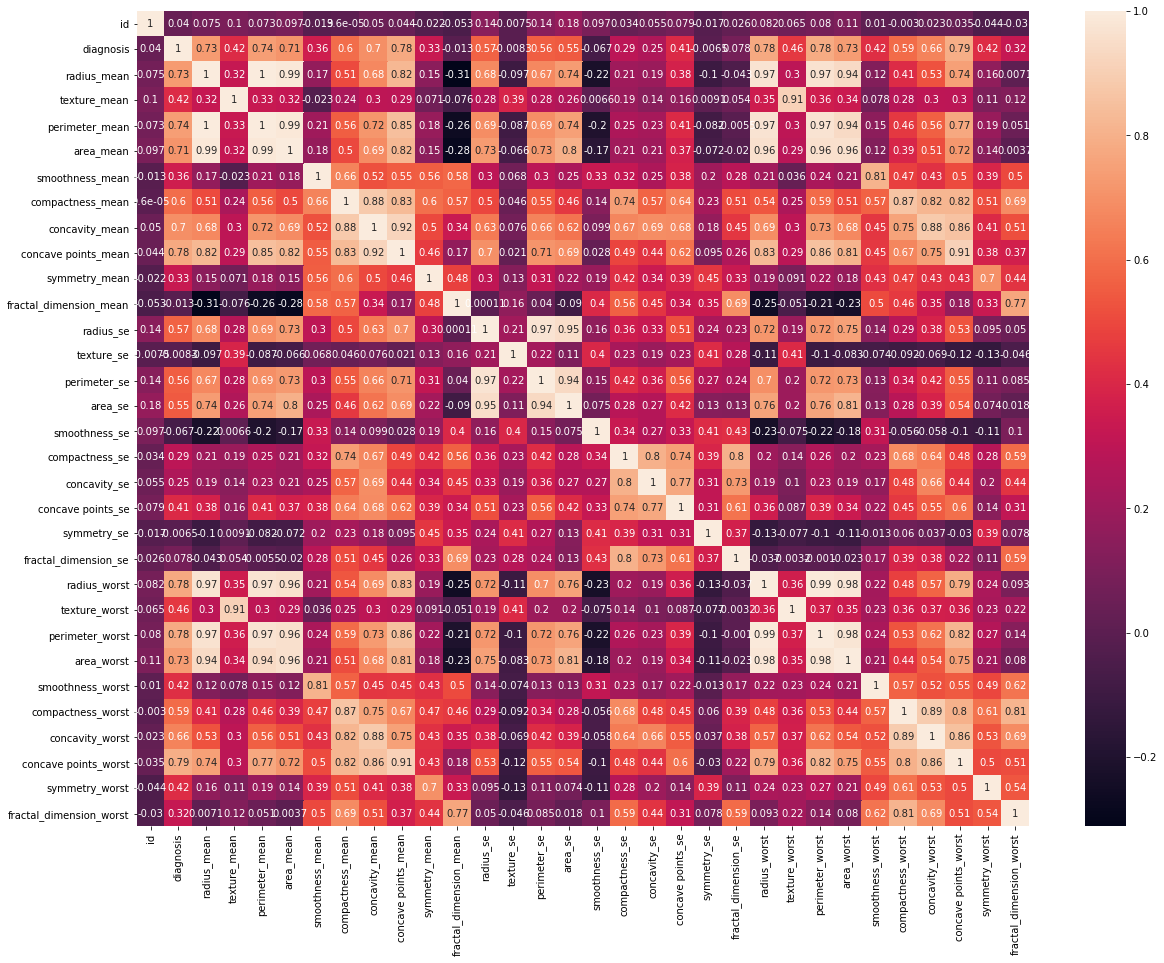

In [36]:
# Seaborn Heatmap

plt.figure(figsize=(20,15))
sns.heatmap(cancer.corr(), annot=True)

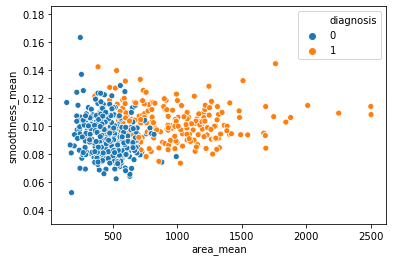

In [35]:
# Scatterplot to illustrate distribution
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = cancer)


Let's take a look at some visualizations to get some insights on the features. 

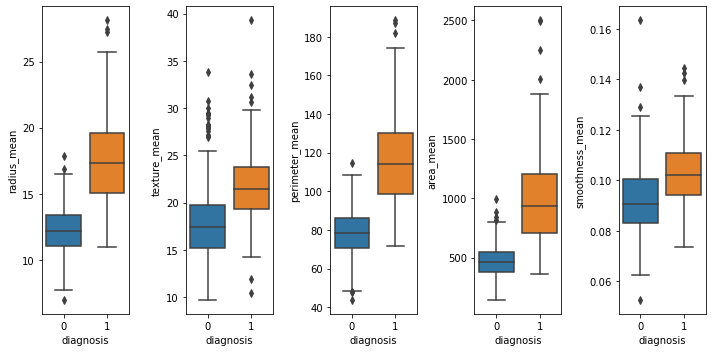

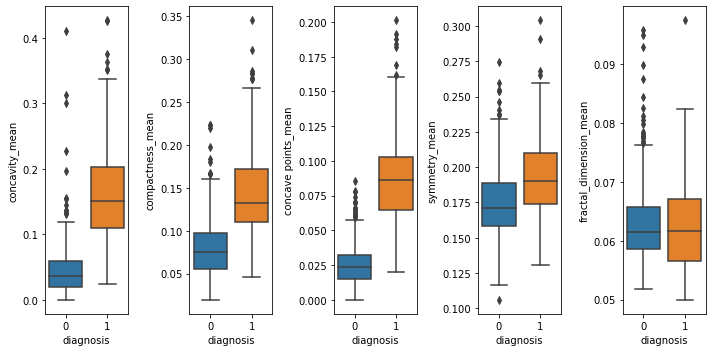

In [38]:
# Boxplot

plt.rcParams['figure.figsize']=(10,5)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
sns.boxplot('diagnosis',y='radius_mean',data=cancer, ax=ax1)
sns.boxplot('diagnosis',y='texture_mean',data=cancer, ax=ax2)
sns.boxplot('diagnosis',y='perimeter_mean',data=cancer, ax=ax3)
sns.boxplot('diagnosis',y='area_mean',data=cancer, ax=ax4)
sns.boxplot('diagnosis',y='smoothness_mean',data=cancer, ax=ax5)
f.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
sns.boxplot('diagnosis',y='compactness_mean',data=cancer, ax=ax2)
sns.boxplot('diagnosis',y='concavity_mean',data=cancer, ax=ax1)
sns.boxplot('diagnosis',y='concave points_mean',data=cancer, ax=ax3)
sns.boxplot('diagnosis',y='symmetry_mean',data=cancer, ax=ax4)
sns.boxplot('diagnosis',y='fractal_dimension_mean',data=cancer, ax=ax5)    
f.tight_layout()


From the above figures, it is evident that measurements of Malignant samples are larger in size. 

### Defining Dependent and Independent Values

In [52]:
# Define X and y

X = cancer.iloc[:, 2:31].values
y = cancer.iloc[:, 1].values

As we know that data is imblanced, we will use Synthetics Minority Over Sampling Technique (SMOTE) to increase the minority class i.e. Malignant. 

In [53]:
# Using SMOTE to balance the dataset

from imblearn.over_sampling import SMOTE

sm =SMOTE(random_state=42)
X, y = sm.fit_resample(X,y)

In [55]:
# Checking the class distribution after the application of SMOTE

pd.Series(y).value_counts()

1    357
0    357
dtype: int64

In [56]:
# Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [57]:
# Scaling the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 4. Modelling

Now that we have the data ready, let's create the below models:

1. Logistic Regression
2. K Nearest Neighbor
3. Support Vector Machine 
4. Gaussian Naive Bayes
5. Decision Tree Classifier
6. Random Forest Classifier

To make it easy, a function will be defined to create the above models. 

In [74]:
# Defining a function

def model(X_train,y_train):
    
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train) 
    
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)
    
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)
    
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    dtc.fit(X_train, y_train)
    
    rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    rfc.fit(X_train, y_train)
    
    print('Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
    print('Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    print('Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
    print('Decision Tree Classifier Training Accuracy:', dtc.score(X_train, y_train))
    print('Random Forest Classifier Training Accuracy:', rfc.score(X_train, y_train))
                                                                                         
    return log, knn, svc_lin, gauss, dtc, rfc

In [75]:
model = model(X_train, y_train)

Logistic Regression Training Accuracy: 0.978984238178634
K Nearest Neighbor Training Accuracy: 0.9719789842381786
Support Vector Machine (Linear Classifier) Training Accuracy: 0.978984238178634
Gaussian Naive Bayes Training Accuracy: 0.9334500875656743
Decision Tree Classifier Training Accuracy: 1.0
Random Forest Classifier Training Accuracy: 1.0


## 5. Model Evaluation

### 5.1 Random Forest Classifier

In [107]:
# Random Forest Classifier

rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)
    

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [108]:
# Confusion Matrix

y_predict = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

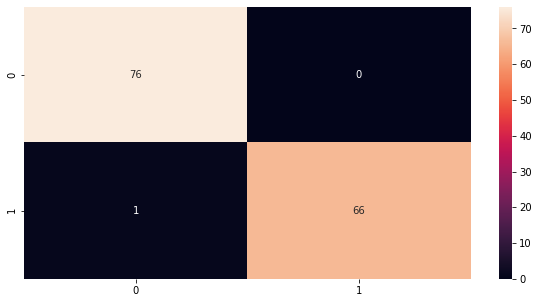

In [109]:
# Confusion Matrix

sns.heatmap(cm, annot=True)

Hence, we have 76 true positives, 66 true negatives and 1 false positive. 

In [110]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.99      0.99        67

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



### 5.2 Decision Tree Classifier

In [111]:
# Decision Tree Classifier

dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [112]:
# Confusion Matrix

y_predict = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

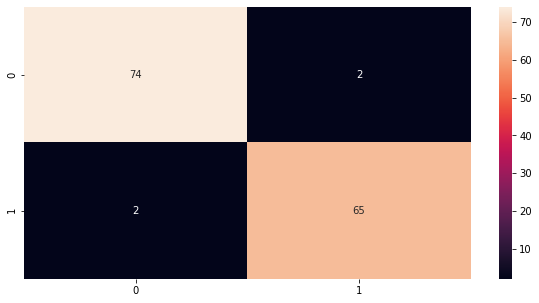

In [113]:
# Confusion Matrix

sns.heatmap(cm, annot=True)

Here, we have 74 true positives, 65 true negatives, 2 false positives and 2 false negatives.

In [114]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        76
           1       0.97      0.97      0.97        67

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



### 5.3 Gaussian Naive Bayes

In [115]:
# Gaussian Naive Bayes

gauss = GaussianNB()
gauss.fit(X_train, y_train)

GaussianNB()

In [116]:
# Confusion Matrix

y_predict = gauss.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

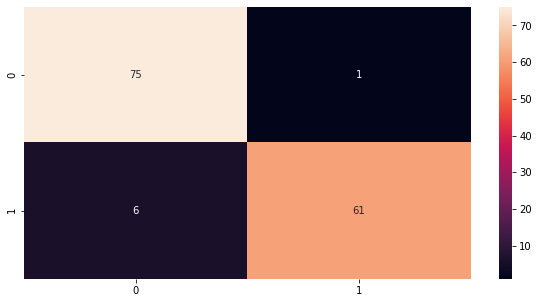

In [117]:
# Confusion Matrix

sns.heatmap(cm, annot=True)

In this model, we have 75 true positives, 61 true negatives, 6 false positives and 1 false negative. 

In [118]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        76
           1       0.98      0.91      0.95        67

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



### 5.4 Support Vector Machine

In [119]:
# Support Vector Machine

svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [120]:
# Confusion Matrix

y_predict = svc_lin.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

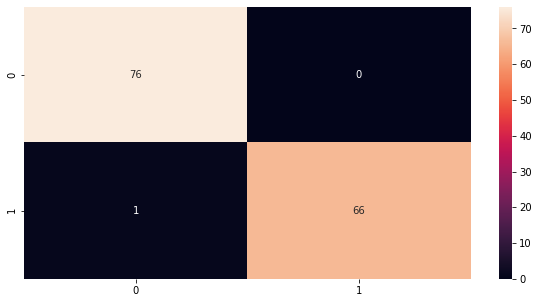

In [121]:
# Confusion Matrix

sns.heatmap(cm, annot=True)

we have 76 true positives, 66 true negatives and 1 false positive. 

In [122]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.99      0.99        67

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



### 5.5 K Nearest Neighbor

In [123]:
# K Nearest Neighbor

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [124]:
# Confusion Matrix

y_predict = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

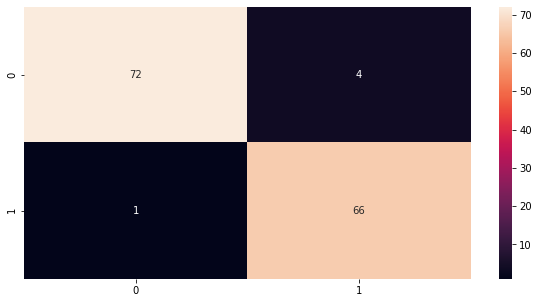

In [125]:
# Confusion Matrix

sns.heatmap(cm, annot=True)

In the K Nearest Neighbor model, we have 72 true positives, 66 true negatives, 1 false positive and 4 false negatives. 

In [126]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        76
           1       0.94      0.99      0.96        67

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



### 5.6 Logistic Regression

In [127]:
# Logistic Regression

log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [128]:
# Confusion Matrix

y_predict = log.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

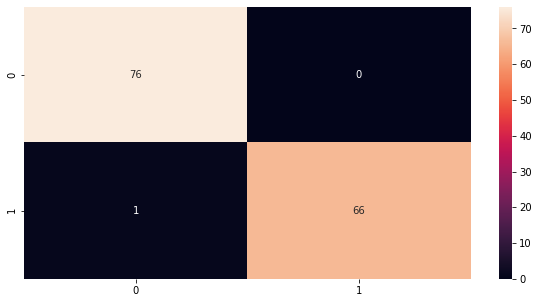

In [129]:
# Confusion Matrix

sns.heatmap(cm, annot=True)

we have 76 true positives, 66 true negatives and 1 false positive. 

In [130]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.99      0.99        67

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



## 6. Deployment

1. From the above evaluation, let's go with Support Vector Machine model for deployment. 
2. We will use Flask framework for the application.
3. We will replicate the SVM model in a text editor and the file will be saved in a python format. 
4. To run the application: Navigate to the deployment folder in CLI and then type "python app.py" 

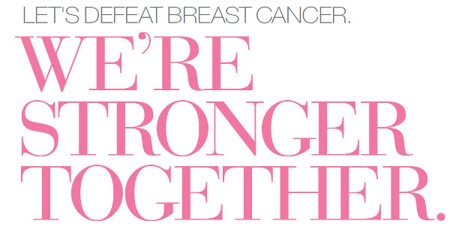

                                                                                                       Vaishnav Gowni